In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

Reading the data

In [84]:
# this is my local path, change it based on how you are going to load the data
fake_job_df = pd.read_csv('fake_job_postings.csv')
fake_job_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Shape of the dataframe:

In [86]:
print('Row Count:', fake_job_df.shape[0])
print('Column Count:', fake_job_df.shape[1])

Row Count: 17880
Column Count: 18


In [87]:
fake_job_df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

17 features, 1 target variable

In [89]:
fake_job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

The majority and minority class distribution non normalized vs. normalized

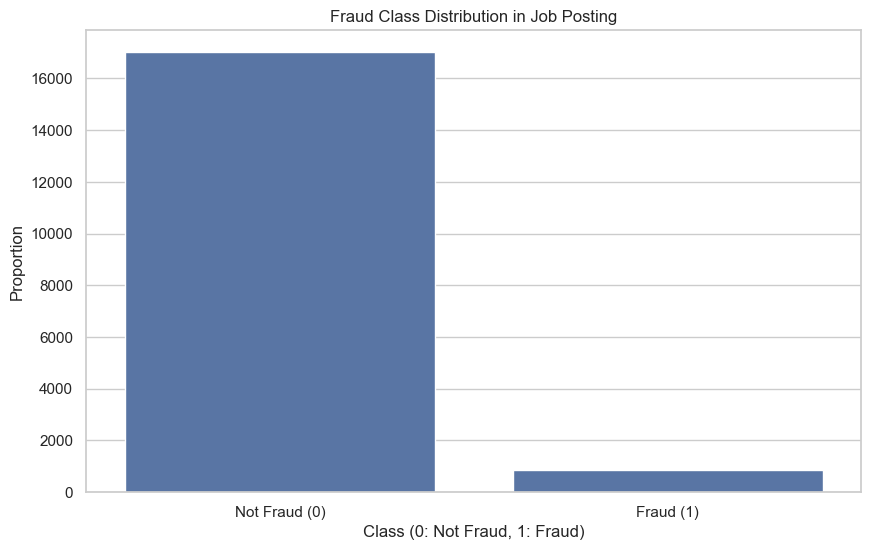

In [91]:
fraud_distribution = fake_job_df['fraudulent'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_distribution.index, y=fraud_distribution.values)
plt.title('Fraud Class Distribution in Job Posting')
plt.xlabel('Class (0: Not Fraud, 1: Fraud)')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.show()

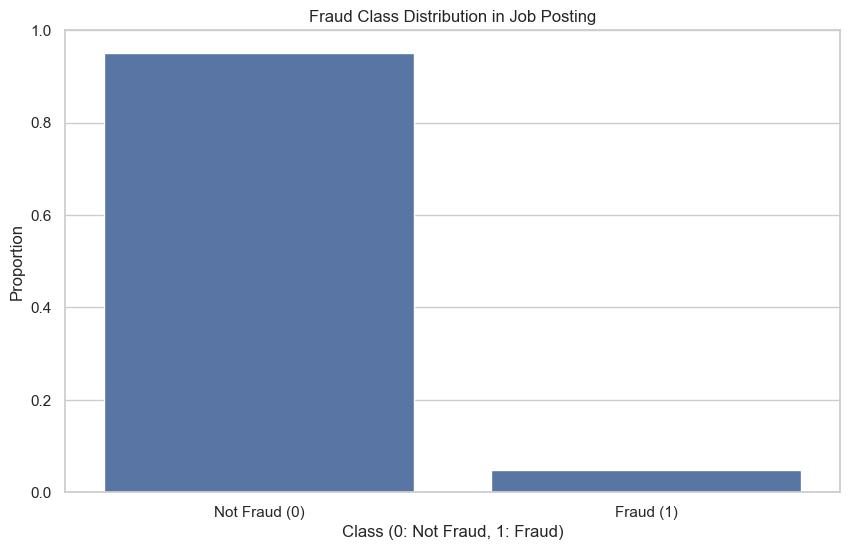

In [92]:
fraud_distribution_norm = fake_job_df['fraudulent'].value_counts(normalize=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_distribution_norm.index, y=fraud_distribution_norm.values)
plt.title('Fraud Class Distribution in Job Posting')
plt.xlabel('Class (0: Not Fraud, 1: Fraud)')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.ylim(0, 1)
plt.show()


Looking at the fraud distribution by job function

In [94]:
fake_job_df['function'].isnull().sum()

6455

In [95]:
function_df = fake_job_df.dropna(subset=['function'])
print('Row Count:', function_df.shape[0])
print('Column Count:', function_df.shape[1])

Row Count: 11425
Column Count: 18


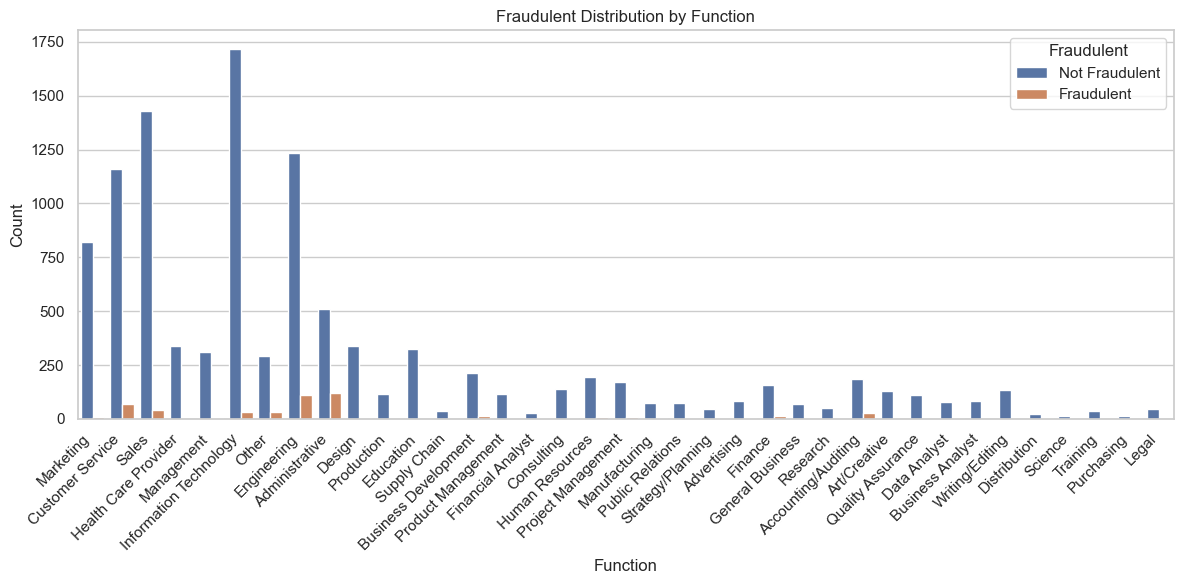

In [96]:
sns.set(style='whitegrid')

# Create a count plot to show the distribution of fraudulent job postings by department
plt.figure(figsize=(12, 6))
sns.countplot(data=function_df, x='function', hue='fraudulent')
plt.xticks(rotation=45, ha='right')
plt.title('Fraudulent Distribution by Function')
plt.xlabel('Function')
plt.ylabel('Count')
plt.legend(title='Fraudulent', labels=['Not Fraudulent', 'Fraudulent'])
plt.tight_layout()
plt.show()

Looking at the fraud distribution by employment type

In [98]:
emp_type_df = fake_job_df.dropna(subset=['employment_type'])
print('Row Count:', emp_type_df.shape[0])
print('Column Count:', emp_type_df.shape[1])

Row Count: 14409
Column Count: 18


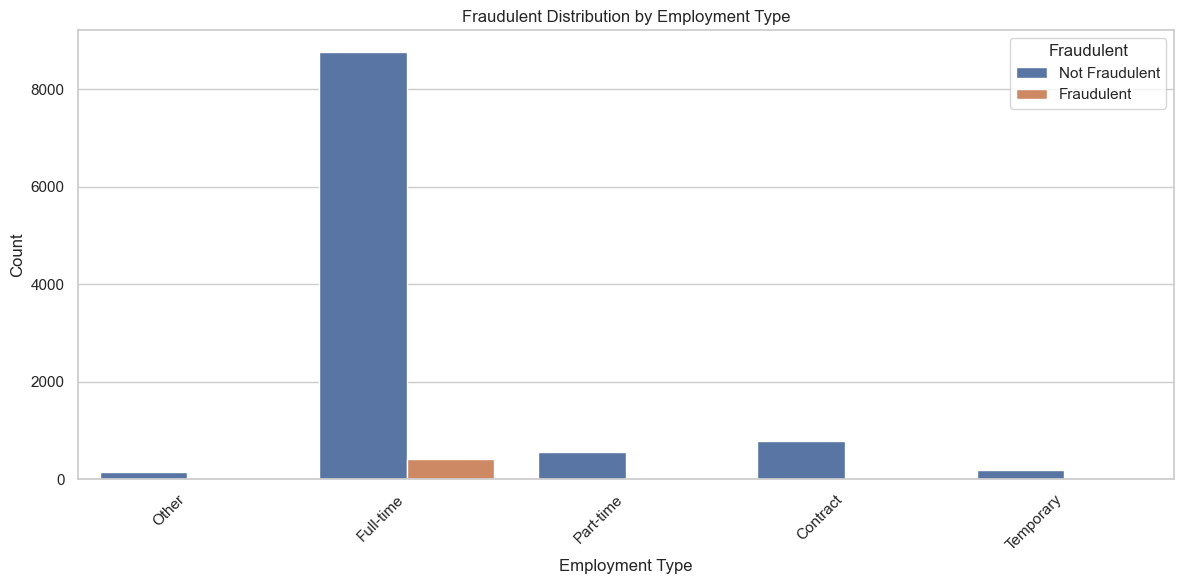

In [99]:
sns.set(style='whitegrid')

# Create a count plot to show the distribution of fraudulent job postings by department
plt.figure(figsize=(12, 6))
sns.countplot(data=function_df, x='employment_type', hue='fraudulent')
plt.xticks(rotation=45, ha='right')
plt.title('Fraudulent Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.legend(title='Fraudulent', labels=['Not Fraudulent', 'Fraudulent'])
plt.tight_layout()
plt.show()

In [100]:
fake_job_df = pd.read_csv('fake_job_postings.csv')
fake_job_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [118]:
columns_to_drop = ['title','location','salary_range','company_profile','description','requirements','benefits','job_id','department','industry']
categorical_columns = ['employment_type', 'required_experience', 'function','required_education']
encoder = OneHotEncoder(drop='first', sparse_output=False)

fake_job_df_encoded = encoder.fit_transform(fake_job_df[categorical_columns]).astype(int)
One_hot_df = pd.DataFrame(fake_job_df_encoded, columns = encoder.get_feature_names_out(categorical_columns))

fake_job_df_encoded1 = pd.concat([fake_job_df,One_hot_df],axis = 1)
fake_job_df_encoded1 = fake_job_df_encoded1.drop(categorical_columns, axis = 1)
fake_job_df_encoded2 = fake_job_df_encoded1.drop(columns_to_drop, axis = 1)
fake_job_df_encoded2.head()

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,employment_type_nan,required_experience_Director,required_experience_Entry level,required_experience_Executive,required_experience_Internship,required_experience_Mid-Senior level,required_experience_Not Applicable,required_experience_nan,function_Administrative,function_Advertising,function_Art/Creative,function_Business Analyst,function_Business Development,function_Consulting,function_Customer Service,function_Data Analyst,function_Design,function_Distribution,function_Education,function_Engineering,function_Finance,function_Financial Analyst,function_General Business,function_Health Care Provider,function_Human Resources,function_Information Technology,function_Legal,function_Management,function_Manufacturing,function_Marketing,function_Other,function_Product Management,function_Production,function_Project Management,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing,function_nan,required_education_Bachelor's Degree,required_education_Certification,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma,required_education_nan
0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


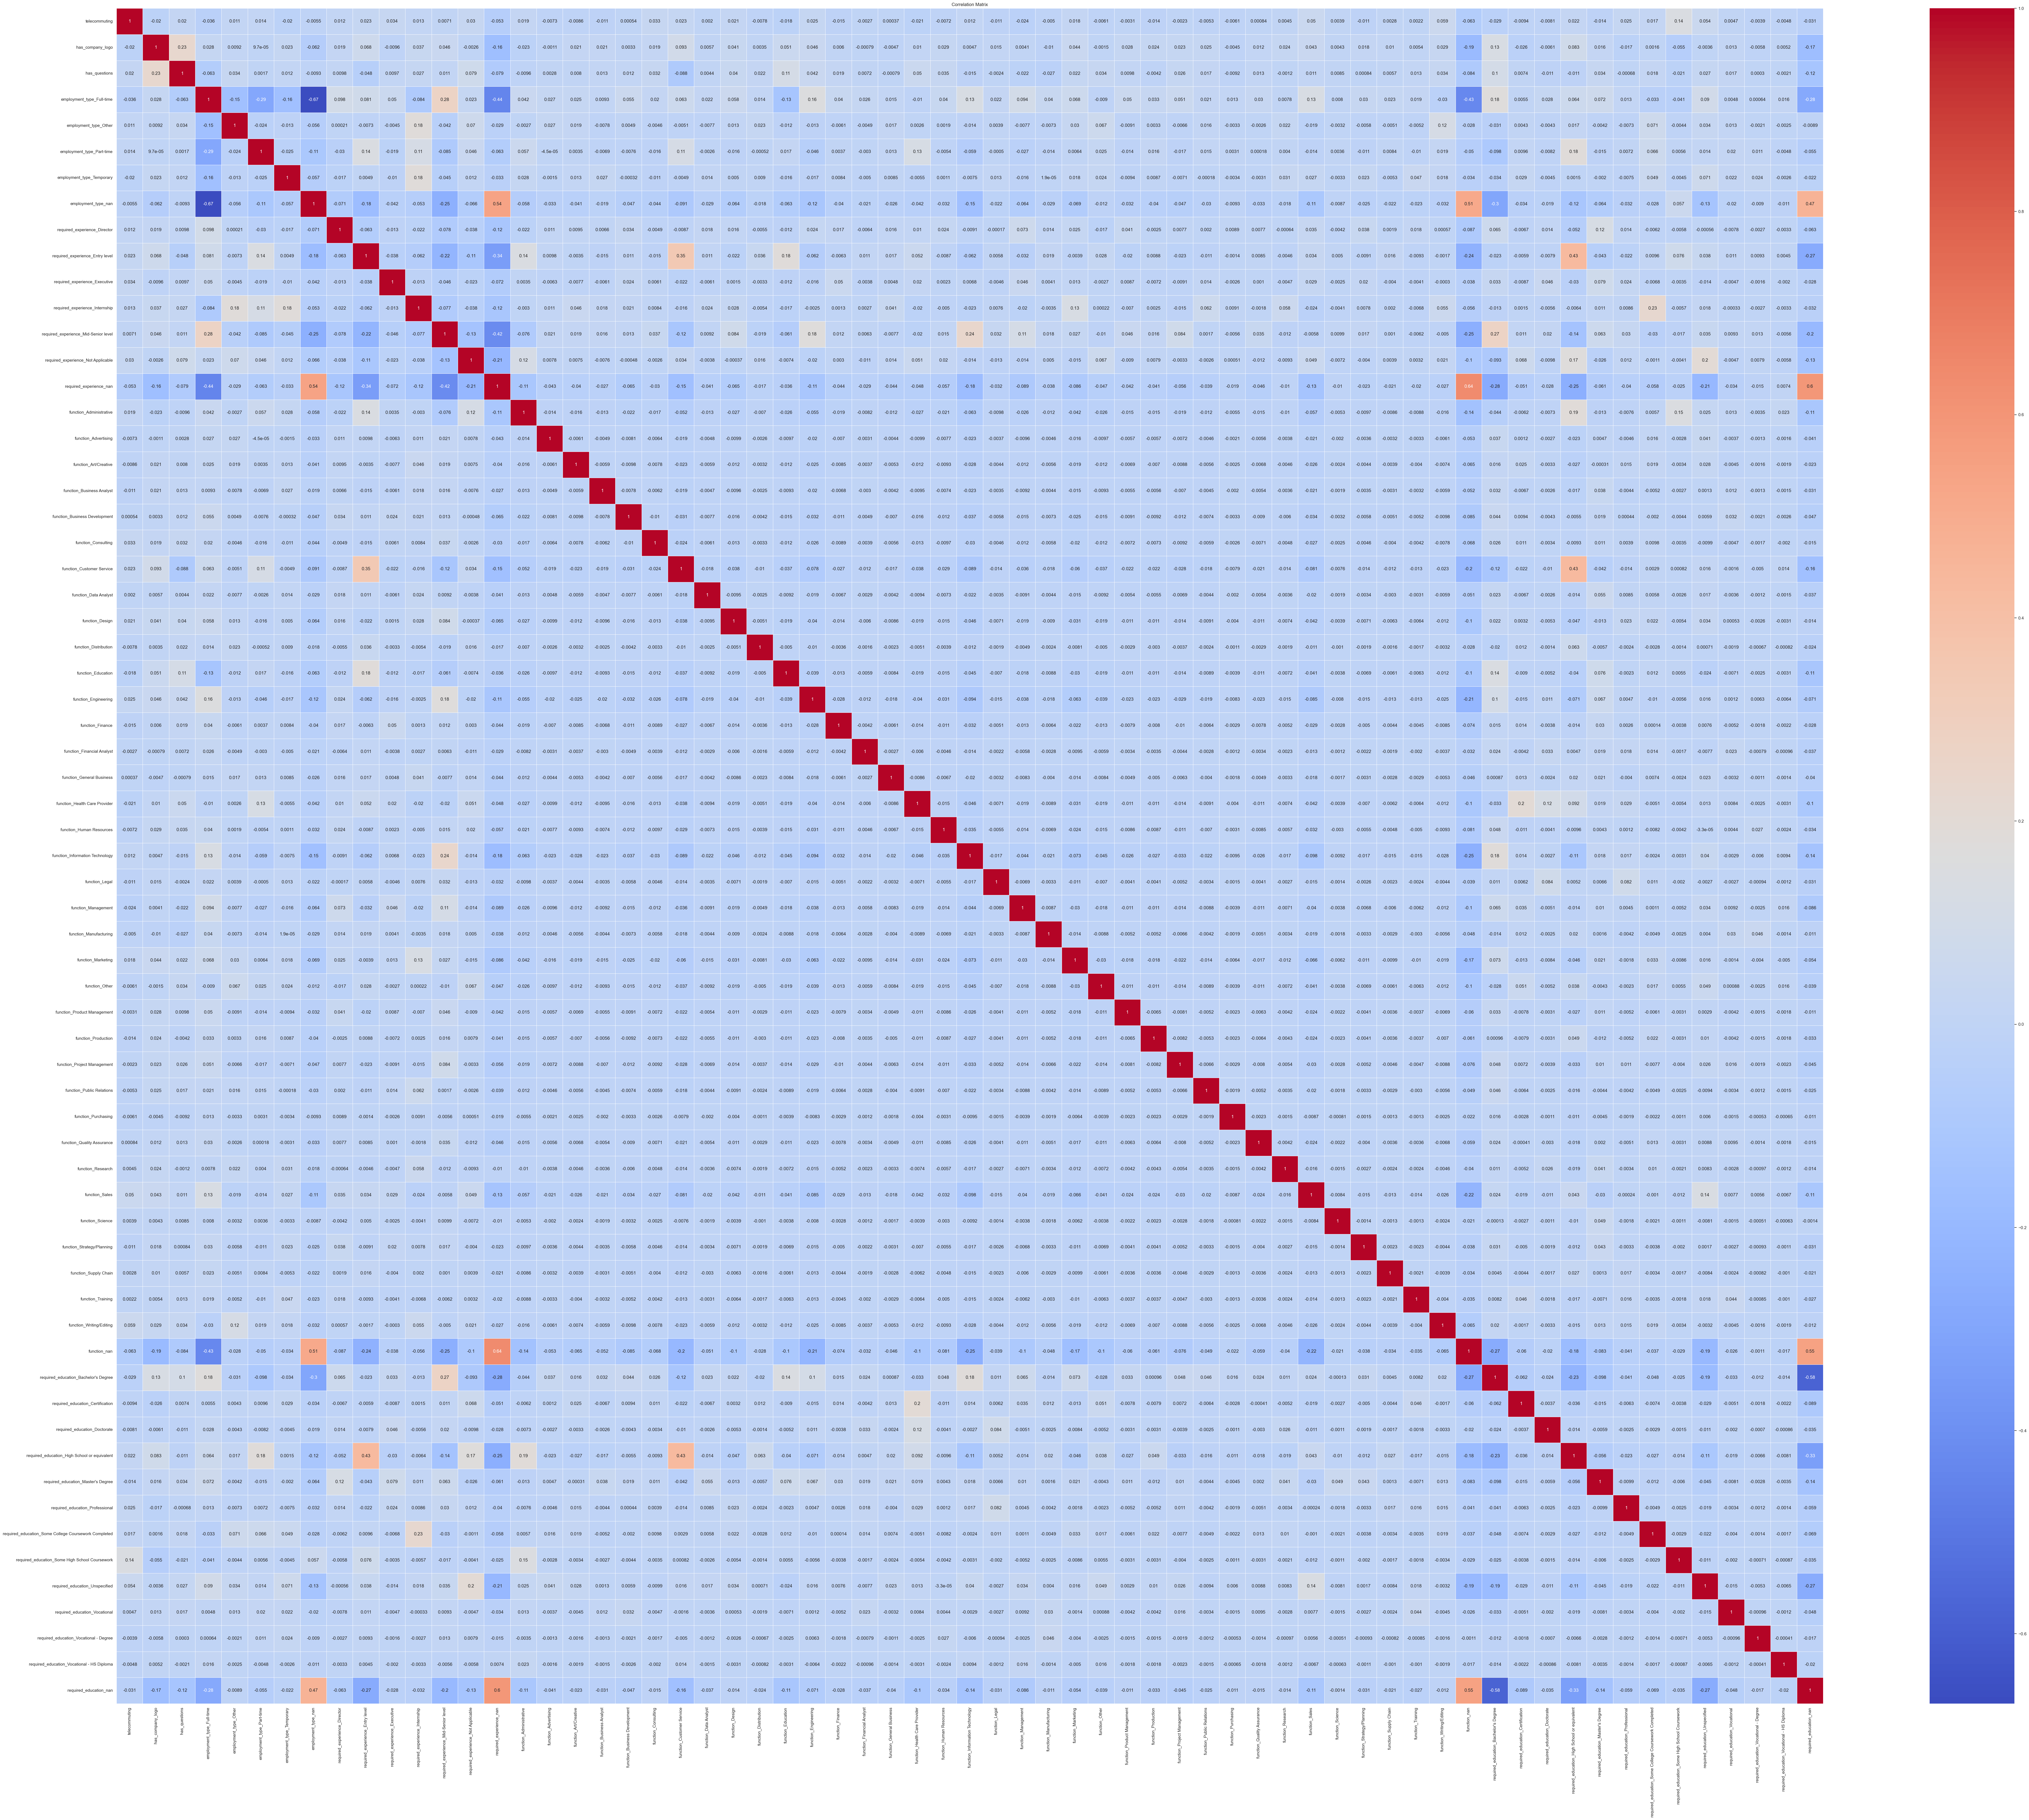

In [126]:

correlation_matrix = fake_job_df_encoded2.drop('fraudulent',axis=1).corr()

plt.figure(figsize=(100, 80))  # Adjust the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix')
plt.show()

